In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('results_r.csv')
df.head(2)
# df = df.drop(['Season','DateTime','home_team_name','away_team_name','FTR','FTHG','FTAG','HTHG','HTAG','HTR'], axis = 1)
# df = df.ewm(alpha = 0.1).mean()

,Season,DateTime,home_team_name,away_team_name,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2017-18,2017-08-11T00:00:00Z,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,4,9,12,0,1,0,0
1,2017-18,2017-08-12T00:00:00Z,Brighton,Man City,0,2,A,0,0,D,...,2,4,3,10,6,9,0,2,0,0


In [ ]:
# df.corr()

In [ ]:
X = df.drop(['Season','DateTime','home_team_name','away_team_name','FTR','FTHG','FTAG','HTHG','HTAG','HTR'], axis = 1)
# X
y= df['FTR']
# X
# y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
X_train.shape, X_test.shape
# y_train
# X_test.head(1)
# a

((1463, 12), (366, 12))

In [ ]:
def models(x_train, y_train):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics import f1_score
  classifier_rf = RandomForestClassifier(random_state=10,max_depth=5,
                                       n_estimators=100, oob_score=True)
  classifier_rf.fit(X_train, y_train)
  # op = classifier_rf.predict(X_test)
  rf = RandomForestClassifier(random_state=10, n_jobs=-1)
  params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
  grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
  grid_search.fit(X_train, y_train)
  # ok = grid_search.predict(X_test)
  rf_best = grid_search.best_estimator_
  imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})
  imp_df.sort_values(by="Imp", ascending=False)
  # f1_score(ok,y_test, average='weighted')
  print("Accuracy of Random Forest before: ",classifier_rf.score(X_train,y_train))
  print("Accuracy of Random Forest after Grid Search: ",grid_search.score(X_train,y_train))

  arraymodels = ['Random_forest',classifier_rf]
  return arraymodels

In [ ]:
model = models(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Accuracy of Random Forest before:  0.6390977443609023
Accuracy of Random Forest after Grid Search:  0.6855775803144224


In [ ]:
ok = model[1].predict(X_test)
ok

array(['H', 'A', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'A',
       'H', 'H', 'A', 'H', 'A', 'A', 'H', 'A', 'A', 'H', 'A', 'H', 'H',
       'A', 'H', 'A', 'A', 'A', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'A',
       'A', 'D', 'A', 'A', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'H', 'A',
       'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'A', 'A', 'A', 'A', 'A', 'H', 'H', 'A',
       'H', 'H', 'H', 'A', 'H', 'H', 'A', 'A', 'H', 'A', 'A', 'H', 'A',
       'A', 'A', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'A',
       'A', 'H', 'H', 'A', 'H', 'H', 'A', 'A', 'A', 'A', 'H', 'A', 'A',
       'H', 'H', 'A', 'A', 'H', 'A', 'A', 'H', 'H', 'H', 'A', 'H', 'H',
       'A', 'H', 'H', 'H', 'A', 'A', 'H', 'A', 'H', 'H', 'H', 'A', 'H',
       'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A',
       'A', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'D', 'A', 'A',
       'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'H', 'A', 'A', 'H

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(y_test, model[1].predict(X_test)))

              precision    recall  f1-score   support

           A       0.59      0.74      0.66       123
           D       0.33      0.01      0.03        76
           H       0.63      0.80      0.71       167

    accuracy                           0.61       366
   macro avg       0.52      0.52      0.46       366
weighted avg       0.56      0.61      0.55       366



In [ ]:
combined = pd.DataFrame(dict(actual=y_test, predicted=ok))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,A,D,H
actual,,,
A,91,1,31
D,29,1,46
H,33,1,133


In [ ]:
from sklearn import metrics


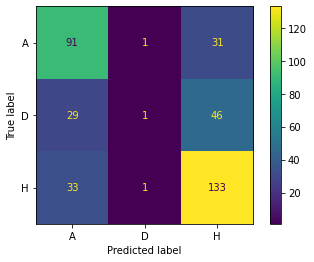

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, ok)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A','D','H'])

cm_display.plot()
plt.show()

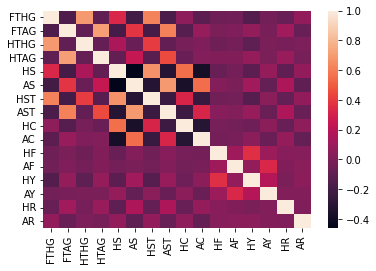

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
FTHG,1.000000,-0.160833,0.697122,-0.095593,0.328985,-0.203026,0.618770,-0.174000,0.061192,-0.112222,-0.055326,-0.043714,-0.145178,-0.027306,-0.068783,0.070114
FTAG,-0.160833,1.000000,-0.090266,0.714064,-0.194147,0.381333,-0.192813,0.612665,-0.132672,0.091761,-0.003384,0.008719,0.079028,-0.015045,0.126717,-0.070104
HTHG,0.697122,-0.090266,1.000000,-0.073129,0.150847,-0.066597,0.405657,-0.086053,-0.018096,0.008180,-0.052517,-0.023728,-0.102139,0.000088,-0.013304,0.005463
HTAG,-0.095593,0.714064,-0.073129,1.000000,-0.089750,0.250322,-0.120959,0.447425,-0.064731,0.020074,0.012951,0.016608,0.083361,-0.001141,0.093504,-0.021096
HS,0.328985,-0.194147,0.150847,-0.089750,1.000000,-0.460677,0.669353,-0.314318,0.560342,-0.371959,-0.069244,-0.025502,-0.111718,0.087011,-0.097852,0.071994
AS,-0.203026,0.381333,-0.066597,0.250322,-0.460677,1.000000,-0.315718,0.694392,-0.358725,0.553101,0.026502,-0.000541,0.126322,-0.078682,0.161516,-0.097570
HST,0.618770,-0.192813,0.405657,-0.120959,0.669353,-0.315718,1.000000,-0.236956,0.319110,-0.238361,-0.037099,-0.027573,-0.129773,0.043696,-0.080049,0.073334
AST,-0.174000,0.612665,-0.086053,0.447425,-0.314318,0.694392,-0.236956,1.000000,-0.230852,0.323916,0.039235,0.020318,0.092046,-0.066219,0.162496,-0.068744
HC,0.061192,-0.132672,-0.018096,-0.064731,0.560342,-0.358725,0.319110,-0.230852,1.000000,-0.309491,-0.018908,-0.027255,-0.047322,0.056384,-0.072280,0.060689
AC,-0.112222,0.091761,0.008180,0.020074,-0.371959,0.553101,-0.238361,0.323916,-0.309491,1.000000,-0.024426,-0.012242,0.051038,-0.063096,0.082106,-0.083243


In [ ]:
# import seaborn as sns

In [ ]:
# sns.pairplot(df)

In [ ]:
# sns.pairplot(df.iloc[:,:12])
            #  , hue='FTHG')

In [ ]:
# home_team_stats = df['FTHG'][(df.home_team_name)].mean()
# stats = df.FTHG.mean()
# stats

In [ ]:
# import pickle
# with open('epl_prediction_random_forest','wb') as f:
#     pickle.dump(model[1], f)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
      'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10, n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
# samp = pd.read_csv('test.csv')
# samp_test = samp.drop(['Season','DateTime','home_team_name','away_team_name','FTR','FTHG','FTAG','HTHG','HTAG','HTR'], axis = 1)
# samp_test

In [ ]:
%%time
grid_search.fit(X_train, y_train)
# ok = grid_search.predict(X_test)
# ok


Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 1.66 s, sys: 130 ms, total: 1.79 s
Wall time: 1min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# ok.shape

In [ ]:
# grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=10)

In [ ]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(80,40))
# plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Home', "Away","Draw"],filled=True);

In [ ]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(80,40))
# plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Home',"Away", "Draw"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.07895424, 0.09430544, 0.28765311, 0.23211396, 0.07388051,
       0.04496748, 0.05654431, 0.05150233, 0.03855502, 0.03246078,
       0.00822051, 0.00084232])

In [ ]:
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Features,Imp
2,HST,0.287653
3,AST,0.232114
1,AS,0.094305
0,HS,0.078954
4,HC,0.073881
6,HF,0.056544
7,AF,0.051502
5,AC,0.044967
8,HY,0.038555
9,AY,0.032461


In [ ]:
# combined = pd.DataFrame(dict(actual=y_test, predicted=ok))

In [ ]:
# pd.crosstab(index=combined["actual"], columns=combined["predicted"])

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
f1_score(ok,y_test, average='weighted')

0.6807022267435089

In [ ]:
# lr = LogisticRegression(C=0.01, solver='liblinear')
# lr.fit(X_train, y_train)
# pre_probs = lr.predict_proba(X_test)
# # pre_probs
# pre_odds = 1 / pre_probs
# pre_odds.shape[0]

In [ ]:
# pre_odds_tab = (X_test.assign(homeWinOdds=[i[2] for i in pre_odds],
#                            drawOdds=[i[1] for i in pre_odds],
#                            awayWinOdds=[i[0] for i in pre_odds]))
# pre_odds_tab


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


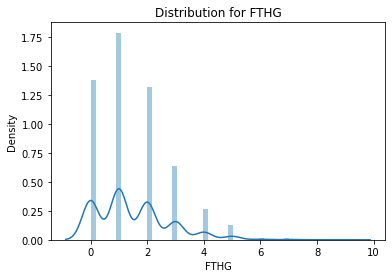

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


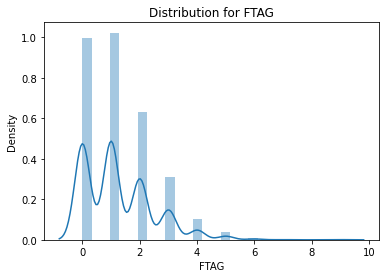

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


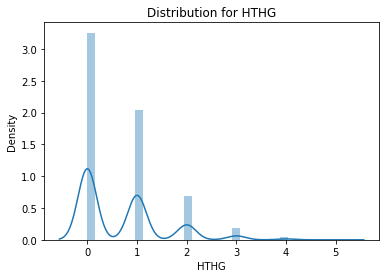

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


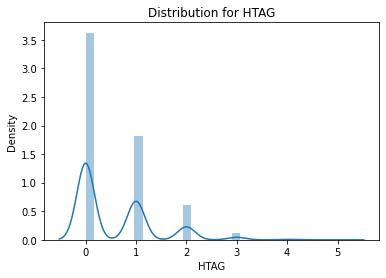

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


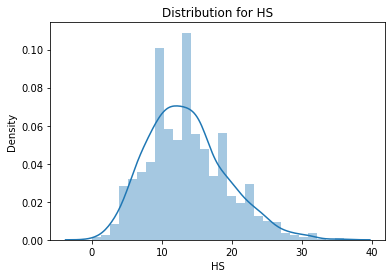

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


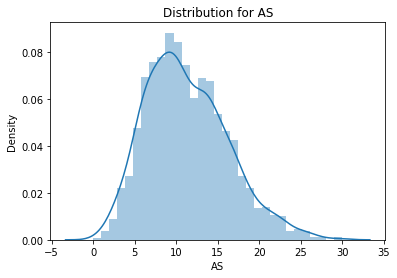

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


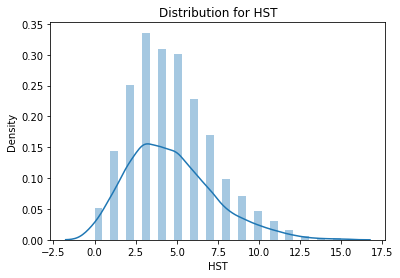

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


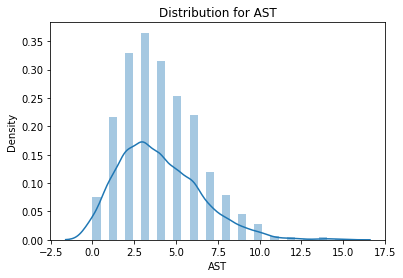

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


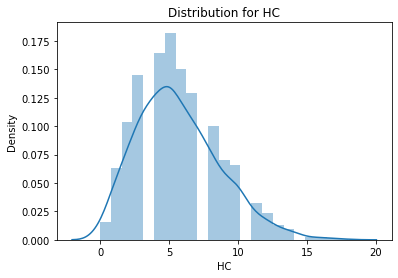

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


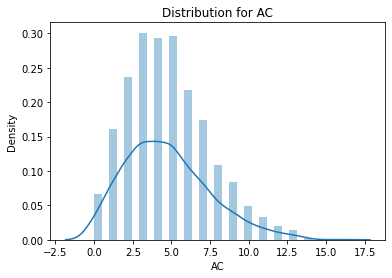

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


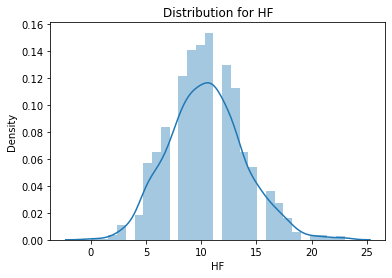

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


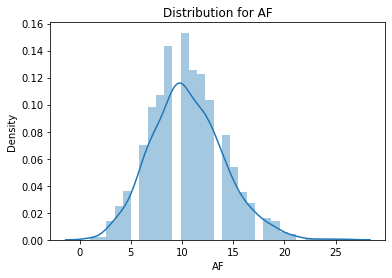

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


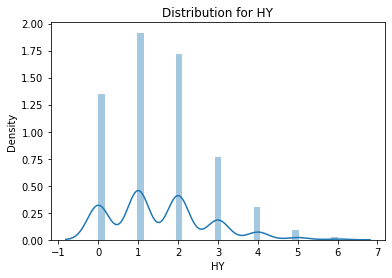

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


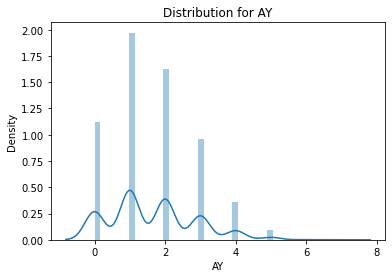

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


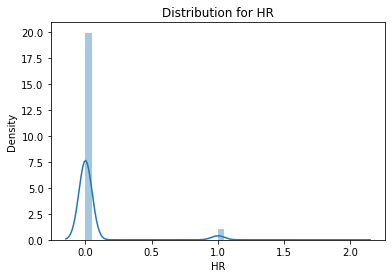

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


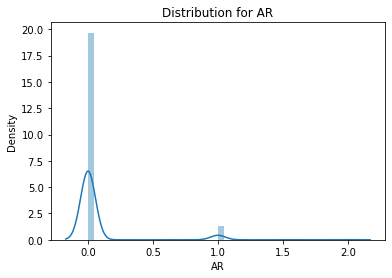

In [ ]:
for col in df.select_dtypes('number').columns:
    sns.distplot(df[col])
    plt.title(f"Distribution for {col}")
    plt.show()